<a href="https://colab.research.google.com/github/BetulCengiz/AygazMakineOgrenmesi/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#logistic regression
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
diabetes = pd.read_csv("diabetes.csv") # yüklediğimiz verileri açıyoruz
df = diabetes.copy() # asıl veri bozulmasın diye kopyalama işlemi yapıyoruz yeni bir değişkene
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isna().sum() # isna ile true false feğerlerini gördük sum ile sayısal değerlerini görürüz

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info() #info ile bilgi alıyoruz non nul değer hiç yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#$numpy array oluşturmalıyız
# df['Outcome'] #bu hali ile bir pandas serisi ama dataframe olmasını istiyoruz
df[['Outcome']] # şimdi bir data frame oldu

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Outcome değerleri 1 veya 0 dolayısıyla şeker hastası olup olmadığını anlarız
# bu verileri kategorize etmeliyiz
df['Outcome'] = df['Outcome'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [ ]:
diabetes['Outcome'].mean()

0.3489583333333333

In [ ]:
from pandas.core.describe import DataFrameDescriber
DataFrameDescriber['Outcome'].mean()

TypeError: ignored

<Axes: ylabel='Outcome'>

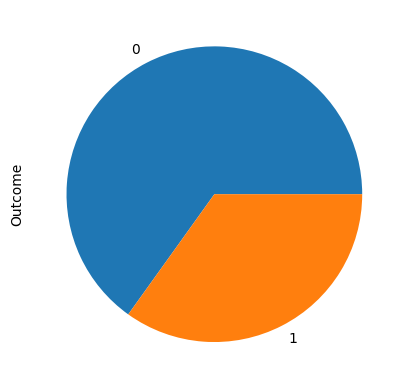

In [ ]:
df['Outcome'].value_counts().plot.pie()

<Axes: >

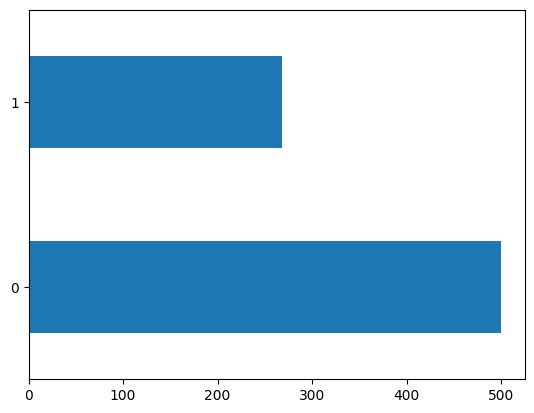

In [ ]:
df['Outcome'].value_counts().plot.barh()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


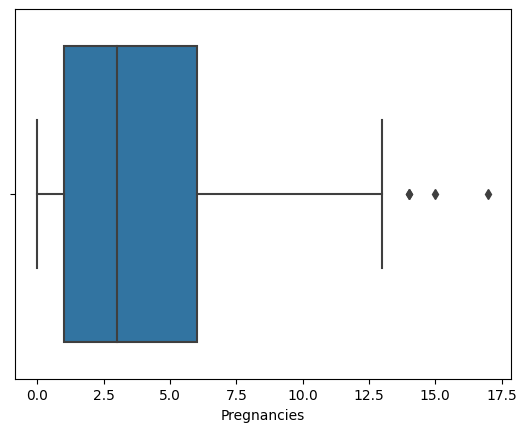

In [ ]:
import seaborn as sns
sns.boxplot(x='Pregnancies',data =df); # aykırı değerleri görmek istiyoruz boxplot ile

In [ ]:
y = df['Outcome']
X = df.drop(['Outcome'],axis=1)

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200) # modelin en iyi optimizasyonunu (uyumunu ) elde etmeye çalışıyor
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
model.intercept_ # bakılması gereken parametreler

array([-7.7215131])

In [ ]:
model.coef_

array([[ 0.13213414,  0.03417036, -0.01399399,  0.00249611, -0.00179709,
         0.0804753 ,  0.72304054,  0.01388948]])

In [ ]:
X_test[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
465,0,124,56,13,105,21.8,0.452,21
656,2,101,58,35,90,21.8,0.155,22
171,6,134,70,23,130,35.4,0.542,29
88,15,136,70,32,110,37.1,0.153,43
457,5,86,68,28,71,30.2,0.364,24


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
y_pred[:5]

array([0, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
df= pd.DataFrame(confusion_matrix(y_test,y_pred),columns =['Predicted Positive','Predicted Negative'],index =['Actual Positive','Actual Negative'])


In [ ]:
df

,Predicted Positive,Predicted Negative
Actual Positive,99,12
Actual Negative,14,29


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8311688311688312

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       111
           1       0.71      0.67      0.69        43

    accuracy                           0.83       154
   macro avg       0.79      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



In [ ]:
model.predict_proba(X_test)[0:10] # verilen inputlara bakarak farklı sınıflar için olasılık tahminleri üretir

array([[0.88609323, 0.11390677],
       [0.93820016, 0.06179984],
       [0.46559492, 0.53440508],
       [0.18186079, 0.81813921],
       [0.89134914, 0.10865086],
       [0.5745998 , 0.4254002 ],
       [0.59945132, 0.40054868],
       [0.84011552, 0.15988448],
       [0.94402336, 0.05597664],
       [0.26502876, 0.73497124]])

In [ ]:
y_test[0:10]

465    0
656    0
171    1
88     1
457    0
374    0
485    1
610    0
334    0
177    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
y_probability = model.predict_proba(X_test)
y_probability =y_probability[:,1]
y_probability[0:10]

array([0.11390677, 0.06179984, 0.53440508, 0.81813921, 0.10865086,
       0.4254002 , 0.40054868, 0.15988448, 0.05597664, 0.73497124])

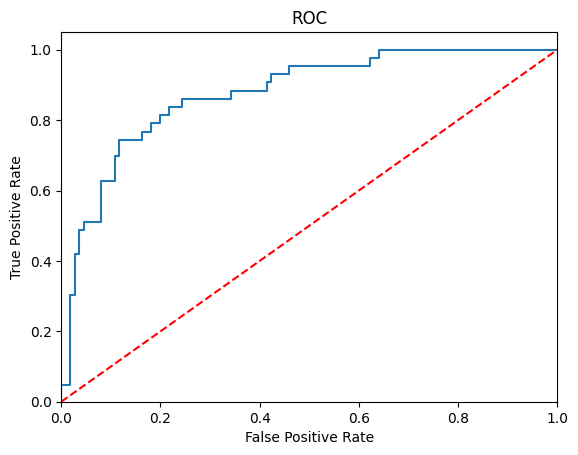

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC(area = %0.2f)" % model_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(([0.0,1.0]))
plt.ylim(([0.0,1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()